<a href="https://colab.research.google.com/github/MartaMkheidze/My301app/blob/master/3%264Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
file_path = '/content/Earthquakes_database.csv'
df = pd.read_csv(file_path)

In [66]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,1/2/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1/4/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1/5/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1/8/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1/9/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [67]:
df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [68]:
df_new = df['Time'].str.split(':', expand=True)

In [69]:
df_new.columns = ['hour', 'minute', 'second']

In [70]:
df_new.head()

,hour,minute,second
0,13,44,18
1,11,29,49
2,18,05,58
3,18,49,43
4,13,32,50


In [71]:
No_values = df.columns[df.isna().any()]

In [72]:
df_droped = df.drop(No_values, axis=1)

In [73]:
print(df_droped)

             Date      Time  Latitude  Longitude        Type   Depth  \
0        1/2/1965  13:44:18   19.2460   145.6160  Earthquake  131.60   
1        1/4/1965  11:29:49    1.8630   127.3520  Earthquake   80.00   
2        1/5/1965  18:05:58  -20.5790  -173.9720  Earthquake   20.00   
3        1/8/1965  18:49:43  -59.0760   -23.5570  Earthquake   15.00   
4        1/9/1965  13:32:50   11.9380   126.4270  Earthquake   15.00   
...           ...       ...       ...        ...         ...     ...   
23407  12/28/2016   8:22:12   38.3917  -118.8941  Earthquake   12.30   
23408  12/28/2016   9:13:47   38.3777  -118.8957  Earthquake    8.80   
23409  12/28/2016  12:38:51   36.9179   140.4262  Earthquake   10.00   
23410  12/29/2016  22:30:19   -9.0283   118.6639  Earthquake   79.00   
23411  12/30/2016  20:08:28   37.3973   141.4103  Earthquake   11.94   

       Magnitude            ID  Source Location Source Magnitude Source  \
0            6.0  ISCGEM860706  ISCGEM          ISCGEM      

In [74]:
bins = [0, 100, 400, df['Depth'].max()]

In [75]:
labels = ['small', 'deep', 'deeper']

In [76]:
df['Depth_category'] = pd.cut(df['Depth'], bins=bins, labels=labels, right=False)

In [77]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Depth_category
0,1/2/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,deep
1,1/4/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,small
2,1/5/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,small
3,1/8/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,small
4,1/9/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,small


In [78]:
melted_df = pd.melt(df, id_vars=['Time', 'Type'], var_name='Parameter', value_name='Value')

In [79]:
melted_df['Value'] = pd.to_numeric(melted_df['Value'], errors='coerce')
pivot_df = melted_df.pivot_table(index=['Time', 'Type'], columns='Parameter', values='Value').reset_index()

In [80]:
melted_df.head()

,Time,Type,Parameter,Value
0,13:44:18,Earthquake,Date,NaN
1,11:29:49,Earthquake,Date,NaN
2,18:05:58,Earthquake,Date,NaN
3,18:49:43,Earthquake,Date,NaN
4,13:32:50,Earthquake,Date,NaN


In [81]:
pivot_df.head()

Parameter,Time,Type,Azimuthal Gap,Depth,Depth Error,Depth Seismic Stations,Horizontal Distance,Horizontal Error,Latitude,Longitude,Magnitude,Magnitude Error,Magnitude Seismic Stations,Magnitude Source,Root Mean Square
0,0:00:03,Earthquake,14.1,96.0,NaN,463.0,NaN,NaN,1.8850,127.36300,6.60,NaN,NaN,NaN,1.02
1,0:00:04,Earthquake,NaN,25.0,NaN,NaN,NaN,NaN,10.5590,-67.33000,6.60,NaN,NaN,NaN,NaN
2,0:00:09,Earthquake,38.8,22.0,NaN,237.0,NaN,NaN,-8.7280,126.85500,5.60,NaN,NaN,NaN,0.97
3,0:00:11,Earthquake,34.0,34.0,1.8,NaN,3.295,6.2,-35.7802,-123.72665,6.35,NaN,NaN,NaN,1.36
4,0:00:15,Earthquake,NaN,33.0,NaN,NaN,NaN,NaN,-16.6130,-172.61300,5.50,NaN,NaN,NaN,1.00


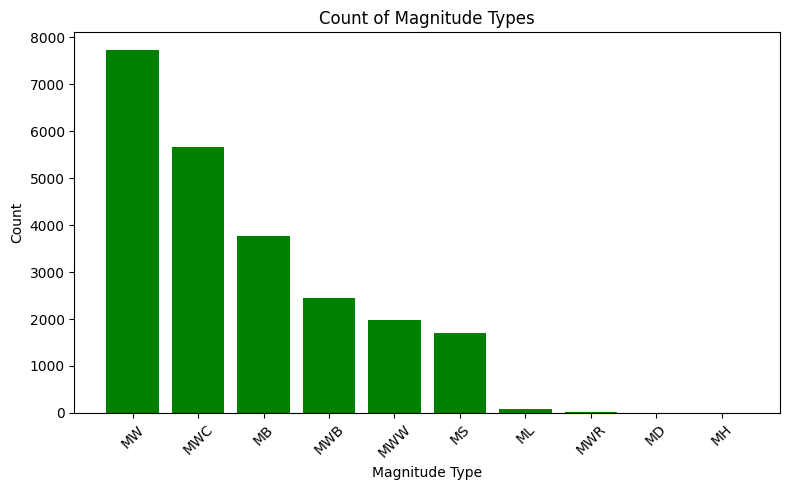

In [82]:
magnitude_counts = df['Magnitude Type'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(magnitude_counts.index, magnitude_counts.values, color='g')
plt.title('Count of Magnitude Types')
plt.xlabel('Magnitude Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [61]:
plt.figure(figsize=(8, 5))
plt.plot(df['Time'], df['Magnitude'], marker='o', linestyle='-', color='b')
plt.title('Magnitude of Earthquakes over Time')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7fd47c138820> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fd47c123a30> (for post_execute):


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Depth'], df['Horizontal Distance'], color='r', marker='o')
plt.title('Depth vs Horizontal Distance')
plt.xlabel('Depth')
plt.ylabel('Horizontal Distance')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
magnitude_type_counts = df['Magnitude Type'].value_counts()

plt.figure(figsize=(8, 5))
plt.pie(magnitude_type_counts, labels=magnitude_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Magnitude Type Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [87]:
import pandas as pd
df['date'] = pd.to_datetime(df['date'])

KeyError: 'date'

In [84]:
start_date = datetime(2023, 1, 1)
future_date = start_date + timedelta(days=5)

NameError: name 'datetime' is not defined

In [85]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Depth_category
0,1/2/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,deep
1,1/4/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,small
2,1/5/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,small
3,1/8/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,small
4,1/9/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,small
